### Generating a Time series
To create a synthetic jet power time-series, we use an input power spectral density (PSD) and jet power probability density function (PDF) to generate a time series for the jet power for a given set of PSD and PDF parameters. We use the method described by \cite{emmanoulopoulos_generating_2013} and implemented in python by \cite{connolly_python_2015}. The algorithm is similar to the widely used \cite{timmer_generating_1995} method, except that it allows for flexibility in specifying the PDF by not enforcing random phases. The PSD is specified as a power-law model of the form 
$$
    \mathrm{PSD}(f) \propto f^{-\alpha}
    % A(\tilde{Q}) {f^{-\alpha}}}             
$$
where $f$ is the temporal frequenc, and the spectral index $\alpha=1$ for a pink or flicker noise spectrum. We use a log-normal distribution of jet powers as our input PDF, given by
$$
p(Q) = \frac{1}{Q\sigma \sqrt{2\pi}} \exp \left[ -\frac{(\ln Q-\ln Q_0)^2}{2\sigma^2} \right],
$$
where $\ln Q_0$ is the natural logarithm of the median jet power 
and $\sigma$ is the natural logarithm of the standard deviation. The mean and mode of the distribution are given by $\exp(\ln Q_0-\sigma^2/2)$ and $\exp(\ln Q_0-\sigma^2)$ respectively. 

To do this, we will use the python package [DELCgen](https://github.com/samconnolly/DELightcurveSimulation).

Papers:

http://adsabs.harvard.edu/abs/2013MNRAS.433..907E

http://arxiv.org/abs/1503.06676

In [ ]:
%matplotlib inline
import DELCgen 
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st
def get_lc(lognorm_params, PSD_params, tbin, Age, RandomSeed=38):
    # Simulation params
    # let's do everything in units of kyr
    # run for 100 Myr (1e5 kyr) in bins of 0.1 Myr
    #lognorm_params = (1.5,0,np.exp(1.5))
    RedNoiseL,aliasTbin = 100,100
    N = Age / tbin

    lc = DELCgen.Simulate_DE_Lightcurve(DELCgen.BendingPL, PSD_params,st.lognorm,lognorm_params,
                                    RedNoiseL=RedNoiseL, aliasTbin=aliasTbin, randomSeed=RandomSeed, LClength=Age, tbin=tbin)

    return (lc)

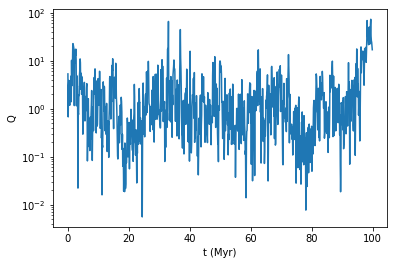

In [81]:
# work in Myr units
# set up light curve. pl_index of 1 means pink noise.
pl_index = 1            # pink noise
sigma = 1.5             # standard deviation in log-space
Age = 100.0             # length of time series (100 Myr)

# bend the power law at 1 Myr^-1 and steeply decay it beyond that with index 20. 
# A,v_bend,a_low,a_high, c - most of these are 1 or 0. 
PSD_params = (1, 1, pl_index, pl_index, 0)
tbin = 0.1                  # 100 kyr bins 
Length = int(Age / tbin)    # number of samples

# parameters of log-normal distribution (we normalise to 1!) 
# the terms here are sigma and the last term is the exponential 
# we set Q_0 =1 here but this could be changed 
lnQ = np.log(Q_0)
lognorm_params = (sigma, 0, np.exp(lnQ))
    
# paramaters for lc are lognorm parameters, PSD parameters, tbin and Length (Age is really number of points)
lc = get_lc(lognorm_params, PSD_params, tbin, Length)

# make a plot
plt.plot(lc.time, lc.flux)
plt.xlabel("t (Myr)")
plt.ylabel("Q")
plt.semilogy()

# save the light curve to a file called Lightcurve.dat
data_to_save = np.column_stack((lc.time, lc.flux))
np.savetxt("Lightcurve.dat", data_to_save)